In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')

pd.set_option("display.max_columns",999)

In [2]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline
from scipy.stats import skew
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import Imputer

In [3]:
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor

# Preparing Data for Machine Learning

In [4]:
df = pd.read_csv('datasets/processed/zomato-final.csv', encoding='utf-8-sig')
df.head()

,name,cuisines,aggregate_rating,rating_text,votes,average_cost_for_two,price_range,locality,city,latitude,longitude,has_online_delivery,has_table_booking,American,Andhra,Arabian,Asian,Awadhi,BBQ,Bakery,Beverages,Biryani,Burger,Burmese,Cafe,Chinese,Coffee,Continental,Desserts,European,Fast Food,Gujarati,Healthy Food,Hyderabadi,Ice Cream,Italian,Japanese,Juices,Lebanese,Mediterranean,Mexican,Modern Indian,Momos,Mughlai,North Indian,Parsi,Pizza,Rajasthani,Rolls,Salad,Sandwich,Seafood,South Indian,Street Food,Sushi,Tex-Mex,Thai,Tibetan,Vietnamese,places,cuisine_count,place_type
0,Sahib’s Barbeque by Ohri’s,"Hyderabadi, Awadhi, BBQ",4.9,Excellent,7647,1400,3,Hitech City,Hyderabad,17.441403,78.376216,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,None,3,None
1,Chili's American Grill & Bar,"Mexican, American, Tex-Mex, Burger, Salad",4.9,Excellent,5313,1400,3,Banjara Hills,Hyderabad,17.422829,78.449465,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,None,5,None
2,Ohri's Tansen,North Indian,4.9,Excellent,3076,1500,3,Necklace Road,Hyderabad,17.431671,78.465058,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,None,1,None
3,Ohri's Serengeti,North Indian,4.9,Excellent,2493,1500,3,Banjara Hills,Hyderabad,17.408402,78.438880,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,None,1,None
4,AB's - Absolute Barbecues,"European, Mediterranean, North Indian",4.9,Excellent,7164,1200,3,Gachibowli,Hyderabad,17.442988,78.357400,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,None,3,None


In [5]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [6]:
df[df.aggregate_rating == 0].shape[0]

0

In [7]:
df = df.drop(["name", "rating_text", "cuisines", "city","places"], axis=1)
df.head()

,aggregate_rating,votes,average_cost_for_two,price_range,locality,latitude,longitude,has_online_delivery,has_table_booking,American,Andhra,Arabian,Asian,Awadhi,BBQ,Bakery,Beverages,Biryani,Burger,Burmese,Cafe,Chinese,Coffee,Continental,Desserts,European,Fast Food,Gujarati,Healthy Food,Hyderabadi,Ice Cream,Italian,Japanese,Juices,Lebanese,Mediterranean,Mexican,Modern Indian,Momos,Mughlai,North Indian,Parsi,Pizza,Rajasthani,Rolls,Salad,Sandwich,Seafood,South Indian,Street Food,Sushi,Tex-Mex,Thai,Tibetan,Vietnamese,cuisine_count,place_type
0,4.9,7647,1400,3,Hitech City,17.441403,78.376216,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,None
1,4.9,5313,1400,3,Banjara Hills,17.422829,78.449465,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,5,None
2,4.9,3076,1500,3,Necklace Road,17.431671,78.465058,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,None
3,4.9,2493,1500,3,Banjara Hills,17.408402,78.438880,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,None
4,4.9,7164,1200,3,Gachibowli,17.442988,78.357400,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,None


In [8]:
df.select_dtypes(include=[np.number]).columns

Index(['aggregate_rating', 'votes', 'average_cost_for_two', 'price_range',
       'latitude', 'longitude', 'has_online_delivery', 'has_table_booking',
       'American', 'Andhra', 'Arabian', 'Asian', 'Awadhi', 'BBQ', 'Bakery',
       'Beverages', 'Biryani', 'Burger', 'Burmese', 'Cafe', 'Chinese',
       'Coffee', 'Continental', 'Desserts', 'European', 'Fast Food',
       'Gujarati', 'Healthy Food', 'Hyderabadi', 'Ice Cream', 'Italian',
       'Japanese', 'Juices', 'Lebanese', 'Mediterranean', 'Mexican',
       'Modern Indian', 'Momos', 'Mughlai', 'North Indian', 'Parsi', 'Pizza',
       'Rajasthani', 'Rolls', 'Salad', 'Sandwich', 'Seafood', 'South Indian',
       'Street Food', 'Sushi', 'Tex-Mex', 'Thai', 'Tibetan', 'Vietnamese',
       'cuisine_count'],
      dtype='object')

In [9]:
df.dtypes

aggregate_rating        float64
votes                     int64
average_cost_for_two      int64
price_range               int64
locality                 object
latitude                float64
longitude               float64
has_online_delivery       int64
has_table_booking         int64
American                  int64
Andhra                    int64
Arabian                   int64
Asian                     int64
Awadhi                    int64
BBQ                       int64
Bakery                    int64
Beverages                 int64
Biryani                   int64
Burger                    int64
Burmese                   int64
Cafe                      int64
Chinese                   int64
Coffee                    int64
Continental               int64
Desserts                  int64
European                  int64
Fast Food                 int64
Gujarati                  int64
Healthy Food              int64
Hyderabadi                int64
Ice Cream                 int64
Italian 

In [10]:
def get_cuisine_cols():
    cols = ["aggregate_rating", "votes", "average_cost_for_two", "price_range",
"locality", "latitude", "longitude", "has_online_delivery",
"has_table_booking", "places", "cuisine_count", "place_type"]
    #'''Returns the column names of all the cuisine type column, not including the cuisine_count column'''
    cuisine_cols = [col for col in df.columns.tolist() if col not in cols]
    return cuisine_cols  

cuisine_cols = get_cuisine_cols()

In [11]:
NumStr = ["price_range", "cuisine_count", "has_online_delivery", "has_table_booking","place_type"]
for col in NumStr:
    df[col]=df[col].astype(str)
    
for col in cuisine_cols:
    df[col]=df[col].astype(int)

In [12]:
class labelenc(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        lab=LabelEncoder()
        X["place_type"] = lab.fit_transform(X["place_type"])
        X["price_range"] = lab.fit_transform(X["price_range"])
        X["cuisine_count"] = lab.fit_transform(X["cuisine_count"])
        X["has_online_delivery"] = lab.fit_transform(X["has_online_delivery"])
        X["has_table_booking"] = lab.fit_transform(X["has_table_booking"])
        return X


We'll check numeric columns for their skew and if it's absolute value is greater than or equal 1, we'll perform a log transform on them. We'll then perform one-hot encoding on the categorical variables. As the cuisine columns have already been encoded, we'll skip these columns. We don't want latitude and longitude columns being log transformed either, especially latitude which are negative numbers. This would result in them being nan due to the infinities created by log transforming a negative number. ML pipelines dont like inf or nan.

In [13]:
class skew_dummies(BaseEstimator, TransformerMixin):
    def __init__(self,skew=0.5):
        self.skew = skew
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        # cuisine cols are already in dummy format, so we dont want them to be 'dummied' again.
        cols = [col for col in X.columns if col not in cuisine_cols]
        # we dont want latitiude and longitude being checked for skew either - latitude will become NaN due to imfinities from log computation
        cols = [col for col in cols if col not in ["latitude", "longitude"]]
        X_numeric = X[cols]
        X_numeric=X_numeric.select_dtypes(exclude=["object"])
        skewness = X_numeric.apply(lambda x: skew(x))
        skewness_features = skewness[abs(skewness) >= self.skew].index
        X[skewness_features] = np.log1p(X[skewness_features])
        X = pd.get_dummies(X)
        return X

In [14]:
# build pipeline
pipe = Pipeline([
    ('labenc', labelenc()),
    ('skew_dummies', skew_dummies(skew=1)),
    ])

We're splitting the data set into a training and test set. Stricly speaking, this isnt so neccessary in this case because we arent trying to minimise our prediction error, however it will be useful to see what error we do get from a very basic ML process. The split isn't stratified, this means there is likely some sampling bias. If this was to be a full-on ML project, I would ensure the sample distrubutions of the training and test set are similar.

In [15]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=1)
full = pd.concat([train, test], ignore_index=True)

In [16]:
data_pipe = pipe.fit_transform(full.copy())
data_pipe.drop("aggregate_rating", axis=1, inplace=True)
print(data_pipe.shape)
data_pipe.head()

(132, 86)


,votes,average_cost_for_two,price_range,latitude,longitude,has_online_delivery,has_table_booking,American,Andhra,Arabian,Asian,Awadhi,BBQ,Bakery,Beverages,Biryani,Burger,Burmese,Cafe,Chinese,Coffee,Continental,Desserts,European,Fast Food,Gujarati,Healthy Food,Hyderabadi,Ice Cream,Italian,Japanese,Juices,Lebanese,Mediterranean,Mexican,Modern Indian,Momos,Mughlai,North Indian,Parsi,Pizza,Rajasthani,Rolls,Salad,Sandwich,Seafood,South Indian,Street Food,Sushi,Tex-Mex,Thai,Tibetan,Vietnamese,cuisine_count,place_type,locality_Ameerpet,locality_Banjara Hills,locality_Basheer Bagh,locality_Begumpet,locality_Bowenpally,locality_Charminar,locality_Falaknuma,locality_Film Nagar,locality_Gachibowli,locality_Gandipet,locality_Himayath Nagar,locality_Hitech City,locality_Jubilee Hills,locality_Karkhana,locality_Kompally,locality_Kondapur,locality_Kukatpally,locality_Lakdikapul,locality_Madhapur,locality_Marigold Hotel,locality_Miyapur,locality_Nampally,locality_Necklace Road,locality_Paradise Circle,locality_Rani Gunj,locality_S D Road,locality_S P Road,locality_Sainikpuri,locality_Shamirpet,locality_Somajiguda,locality_Srinagar Colony
0,5.877736,7.003974,2,17.423955,78.412882,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,4,1.098612,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6.267201,7.601402,3,17.437755,78.398224,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1.098612,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7.226936,6.216606,1,17.443759,78.387385,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.098612,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,7.722235,7.696667,3,17.425610,78.408536,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1.098612,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8.380686,5.993961,0,17.490135,78.396515,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1.098612,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
data_pipe.dtypes

votes                       float64
average_cost_for_two        float64
price_range                   int32
latitude                    float64
longitude                   float64
has_online_delivery           int32
has_table_booking             int32
American                      int32
Andhra                        int32
Arabian                       int32
Asian                         int32
Awadhi                        int32
BBQ                           int32
Bakery                        int32
Beverages                     int32
Biryani                       int32
Burger                        int32
Burmese                       int32
Cafe                          int32
Chinese                       int32
Coffee                        int32
Continental                   int32
Desserts                      int32
European                      int32
Fast Food                     int32
Gujarati                      int32
Healthy Food                  int32
Hyderabadi                  

We'll apply the RobustScaler as there are some outliers.

In [18]:
scaler = RobustScaler()

In [19]:
n_train = train.shape[0]

X_train = data_pipe[:n_train]
y_train = train.aggregate_rating

X_test = data_pipe[n_train:]
y_test = test.aggregate_rating

X_train_scaled = scaler.fit(X_train).transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelling & Evaluation

In [20]:
# define cross validation strategy
def rmse_cv(model,X,y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    return rmse# define cross validation strategy
def rmse_cv(model,X,y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    return rmse

In [21]:
models = [LinearRegression(), Ridge(), Lasso(alpha=0.01,max_iter=10000), RandomForestRegressor(), GradientBoostingRegressor(), SVR(), LinearSVR(),
          ElasticNet(alpha=0.001,max_iter=10000), SGDRegressor(max_iter=1000,tol=1e-3), BayesianRidge(), KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5),
          ExtraTreesRegressor(), XGBRegressor()]

In [22]:
names = ["LR", "Ridge", "Lasso", "RF", "GBR", "SVR", "LinSVR", "Ela", "SGD", "Bay", "Ker", "Extra", "Xgb"]
for name, model in zip(names, models):
    score = rmse_cv(model, X_train_scaled, y_train)
    print("{}: {:.6f}, {:.4f}".format(name, score.mean(), score.std()))

LR: 578083390116.633057, 529423699251.7742
Ridge: 0.132908, 0.0244
Lasso: 0.132833, 0.0198
RF: 0.119383, 0.0128
GBR: 0.116147, 0.0138
SVR: 0.129473, 0.0186
LinSVR: 0.249505, 0.0453
Ela: 0.136339, 0.0287
SGD: 0.527406, 0.1103
Bay: 0.133018, 0.0191
Ker: 0.127802, 0.0211
Extra: 0.124720, 0.0242
Xgb: 0.112880, 0.0147


In [23]:
class grid():
    def __init__(self, model):
        self.model = model
    
    def grid_get(self, X, y, param_grid):
        grid_search = GridSearchCV(self.model, param_grid, cv=5, scoring="neg_mean_squared_error")
        grid_search.fit(X,y)
        print(grid_search.best_params_, np.sqrt(-grid_search.best_score_))
        grid_search.cv_results_['mean_test_score'] = np.sqrt(-grid_search.cv_results_['mean_test_score'])
        print(pd.DataFrame(grid_search.cv_results_)[['params','mean_test_score','std_test_score']])
        return grid_search.best_params_

In [24]:
param_grid={'booster':['gbtree', 'gblinear'], 'max_depth':[2, 3, 4], 'learning_rate':[0.05, 0.1, 0.3], 'n_estimators':[100, 500, 1000], 'n_jobs':[-1]}
best_params_ = grid(XGBRegressor()).grid_get(X_train_scaled, y_train, param_grid)

{'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'n_jobs': -1} 0.11266511703197601
                                               params  mean_test_score  \
0   {'booster': 'gbtree', 'learning_rate': 0.05, '...         0.126144   
1   {'booster': 'gbtree', 'learning_rate': 0.05, '...         0.118420   
2   {'booster': 'gbtree', 'learning_rate': 0.05, '...         0.120345   
3   {'booster': 'gbtree', 'learning_rate': 0.05, '...         0.120843   
4   {'booster': 'gbtree', 'learning_rate': 0.05, '...         0.117506   
5   {'booster': 'gbtree', 'learning_rate': 0.05, '...         0.119255   
6   {'booster': 'gbtree', 'learning_rate': 0.05, '...         0.116601   
7   {'booster': 'gbtree', 'learning_rate': 0.05, '...         0.115389   
8   {'booster': 'gbtree', 'learning_rate': 0.05, '...         0.115784   
9   {'booster': 'gbtree', 'learning_rate': 0.1, 'm...         0.119465   
10  {'booster': 'gbtree', 'learning_rate': 0.1, 'm...         0.119829 

# Top Feature Identification

We'll use the best parameters obtained from our grid search to identify the top features.

In [25]:
xgb = XGBRegressor(**best_params_)
xgb.fit(X_train_scaled, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bytree=1, gamma=0, importance_type='gain',
             learning_rate=0.1, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
             nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
             subsample=1)

In [26]:
FI_xgb = pd.DataFrame({"Feature Importance" : xgb.feature_importances_}, index=data_pipe.columns).sort_values("Feature Importance", ascending=False)

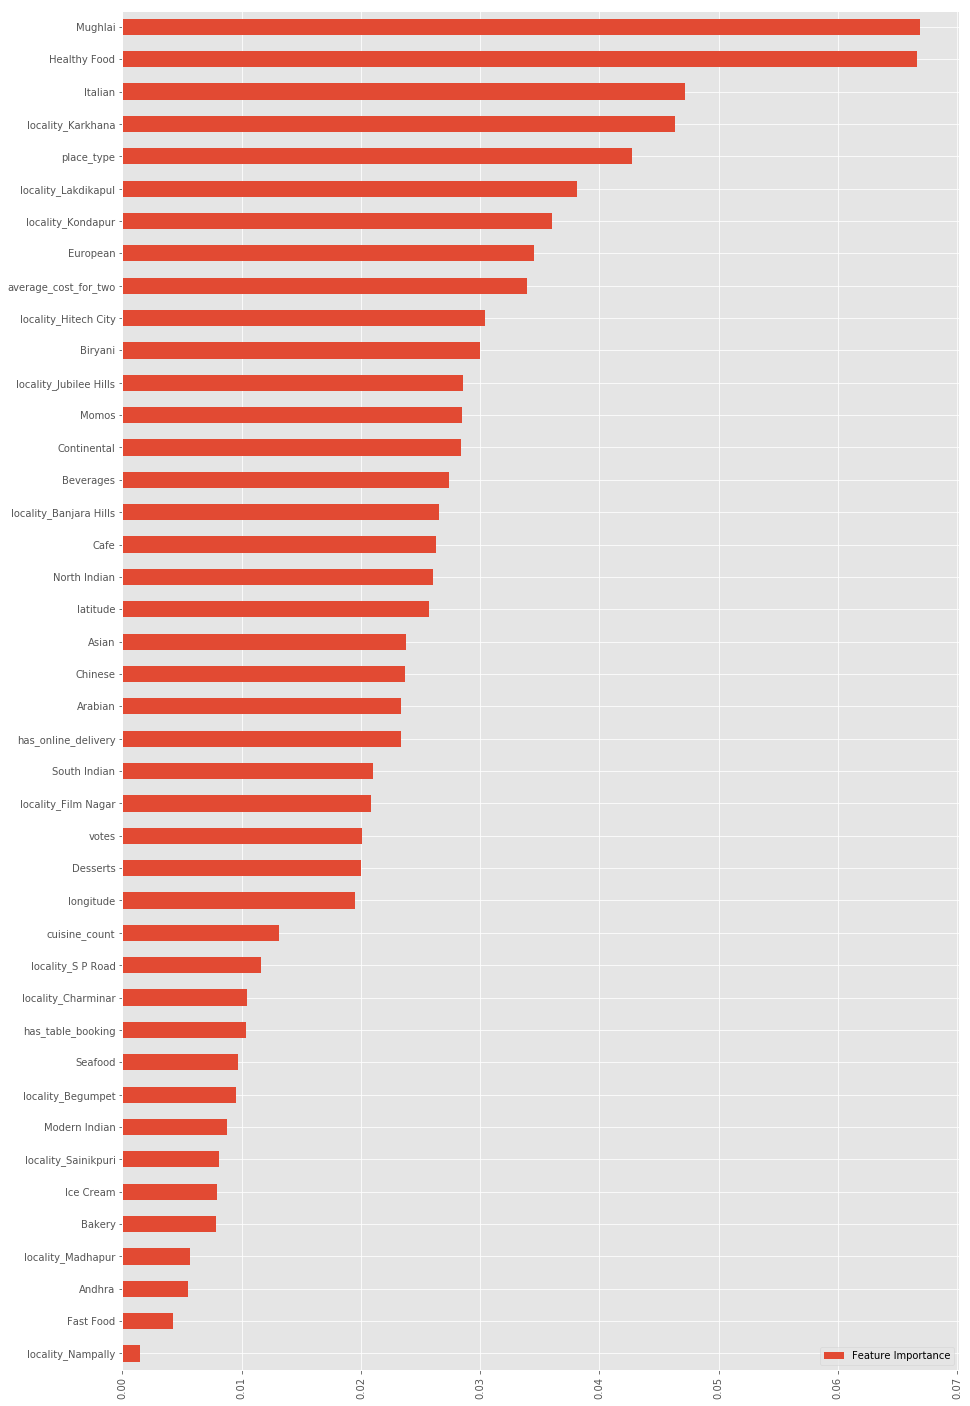

In [27]:
FI_xgb[FI_xgb["Feature Importance"] != 0].sort_values("Feature Importance").plot(kind="barh", figsize=(15,25))
plt.xticks(rotation=90)
plt.show()

# Test Set Predictions and Error Measurement

In [28]:
y_pred = xgb.predict(X_test_scaled)

In [29]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.11987947379861631

# Exporting a Dataset of Feature Importances

In [30]:
FI_xgb.to_csv("datasets/processed/feature_importances.csv")